In [1]:
%matplotlib inline
import rosen
import pylab as plt
import numpy as np
# --> Import sklearn utility functions.
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError
from sklearn.utils import check_X_y, check_array
from sklearn.datasets import make_classification

from plt_style import * 

# Classification with the Perceptron

From: https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a

<img src='timeline-white.png' />  

<img src='neuron-white.png' width=300/>   


$$ A\left( \langle\textbf{w},\textbf{x}\rangle + b\right) = A(y)$$  

$$ \langle\textbf{w},\textbf{x}\rangle = \sum_k^N w_k x_k = w_1 x_1+...+w_n x_n$$


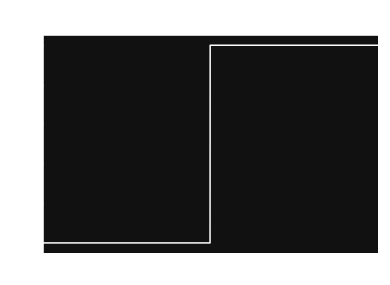

In [2]:
x = np.linspace(-2,2,10001)
plt.plot(x,np.heaviside(x,1),'w-')
plt.xticks([-1,0,1],fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(-1,1)
_=plt.title('Heaviside Function',pad=10,fontsize=24)

In [3]:
# --> Generate toy problem.
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0,                 # No noise.
    class_sep=1.5,
    random_state=9999,         # Fix random seed for reproducibility.
)

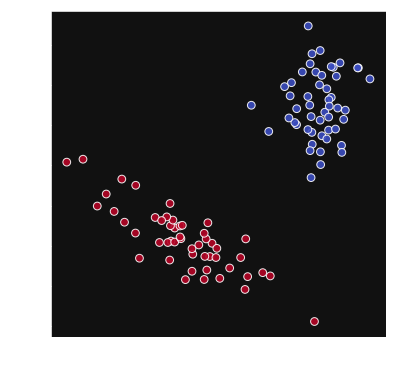

In [4]:
# --> Plot the problem.
_, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(
    X[:,0],X[:,1],
    c=y,
    cmap="coolwarm",
    s=60,
    edgecolors="w",
    alpha=0.9,
)

ax.set_xlabel(r"$x_1$",color='w',fontsize=18)
_=ax.set_ylabel(r"$x_2$",color='w',fontsize=18)

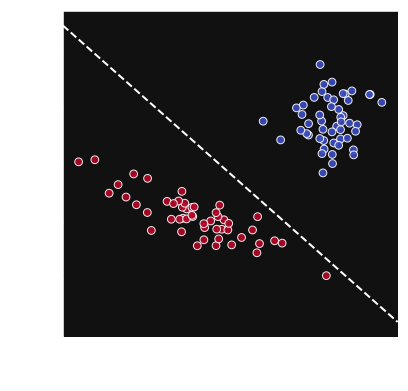

In [5]:
# --> Plot the problem.
_, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(
    X[:,0],X[:,1],
    c=y,
    cmap="coolwarm",
    s=60,
    edgecolors="w",
    alpha=0.9,
)

ax.set_xlabel(r"$x_1$",color='w',fontsize=18)
ax.set_ylabel(r"$x_2$",color='w',fontsize=18)


# --> Classify data using Rosenblatt's perceptron.
model = rosen.Rosenblatt()
model.fit(X, y)

# --> Decision boundary.
def decision(x): 
    return -(model.weights[0] * x + model.bias)/model.weights[1]

x = np.linspace(*ax.get_xlim())

# --> Plot the decision boundary.
ax.plot(x, decision(x),"w--",lw=2)
ax.set_xlim(x.min(), x.max())
plt.xticks(fontsize=18)
_=plt.yticks(fontsize=18)